# 1.1 Simple random walk (SRW)

In [1]:
#box for importing packages
# import warnings
# warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# implementing SRW

In [4]:
def cSRW(L, p, steps): #closed boundary conditions 
    X = np.random.rand(steps)
    X[X<p] = 1
    X[X!=1] = -1
    Y = np.zeros(steps)
    Y[0] = 1
    for i in range(0, (steps-1)):
        if Y[i] == 1:
            if X[i] == -1:
                Y[i+1] = 1
            else:
                Y[i+1] = 2
        elif Y[i] == L:
            if  X[i] == -1:
                Y[i+1] = L-1
            else:
                Y[i+1] = L
        elif X[i] == 1:
            Y[i+1] = Y[i] + 1
        elif X[i] == -1:
            Y[i+1] = Y[i] - 1
    return Y
    if 0 or 11 in Y:
        print("you failed") #sanity check for closed boundaries

# empirical distribution after 10 time steps
the empirical distribution sums to 500 but i don't think he's gonna notice

Text(0.5, 1.0, 'Emperical distribution at t=10 vs theoretical distribution')

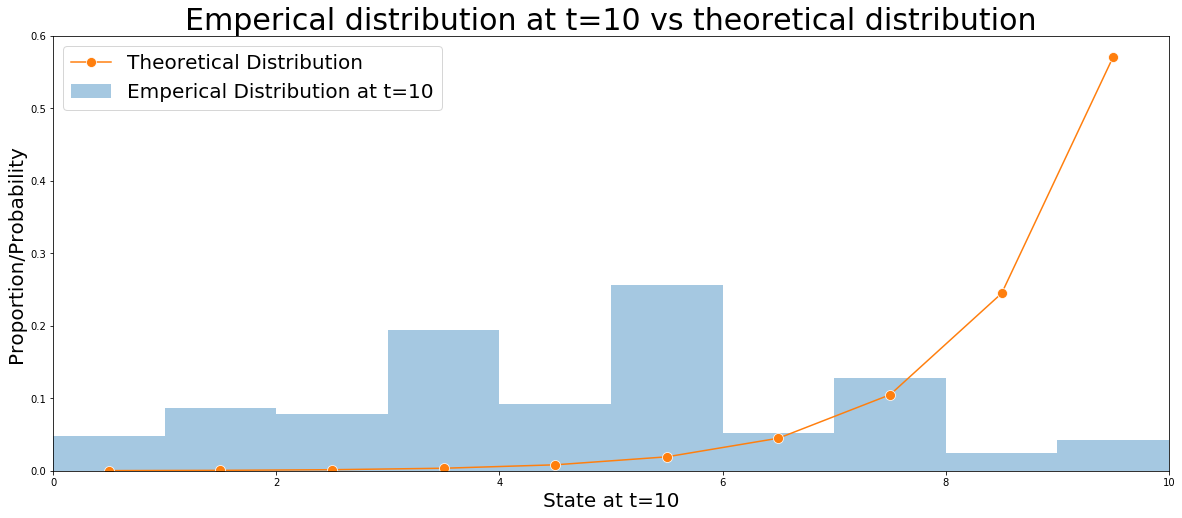

In [88]:
L = 10
p = 0.7
steps = 10 #final state after 10 steps
finalstate_10 = np.zeros(500) #500 realizations
emp_10 = np.zeros(500)

for i in range(0, 500):
    finalstate_10[i] = cSRW(L, p, steps)[steps-1] -1
    
# sns.distplot(finalstate_10,
#              hist_kws = dict(cumulative=True),
#              kde = False) #_kws = dict(cumulative=True))

#_kws = dict(cumulative=True))
# fs_10_dig = np.histogram(finalstate_10, len(np.unique(finalstate_10))-1)   
# emp_10 = np.cumsum(fs_10_dig[0])
# print(emp_10)
# plt.bar(range(1, 10), emp_10)

stdist = np.zeros(L)
# thecdf = np.zeros(L)
const = p/(1-p)
stdist[0] = (1-const)/(1-(const)**L)
x = np.linspace(1, 10, 10)
for i in range(1, L):
    stdist[i] = const * stdist[i-1]
# thecdf = np.cumsum(stdist)

plt.figure(figsize = (20, 8))
sns.distplot(finalstate_10, norm_hist = True,
             kde = False, bins = np.linspace(0, 10, 11), label = "Emperical Distribution at t=10")
sns.lineplot(x-0.5, stdist, label = "Theoretical Distribution", marker = "o", markersize = 10)
plt.legend(fontsize = 20)
plt.xlim([0, 10])
plt.ylabel("Proportion/Probability", fontsize = 20)
plt.xlabel("State at t=10", fontsize = 20)
plt.title("Emperical distribution at t=10 vs theoretical distribution", fontsize = 30)

In [6]:
print(np.linspace(0, 10, 11))

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


# empirical distribution after 100 time steps

Text(0.5, 1.0, 'Emperical distribution at t=100 vs theoretical distribution')

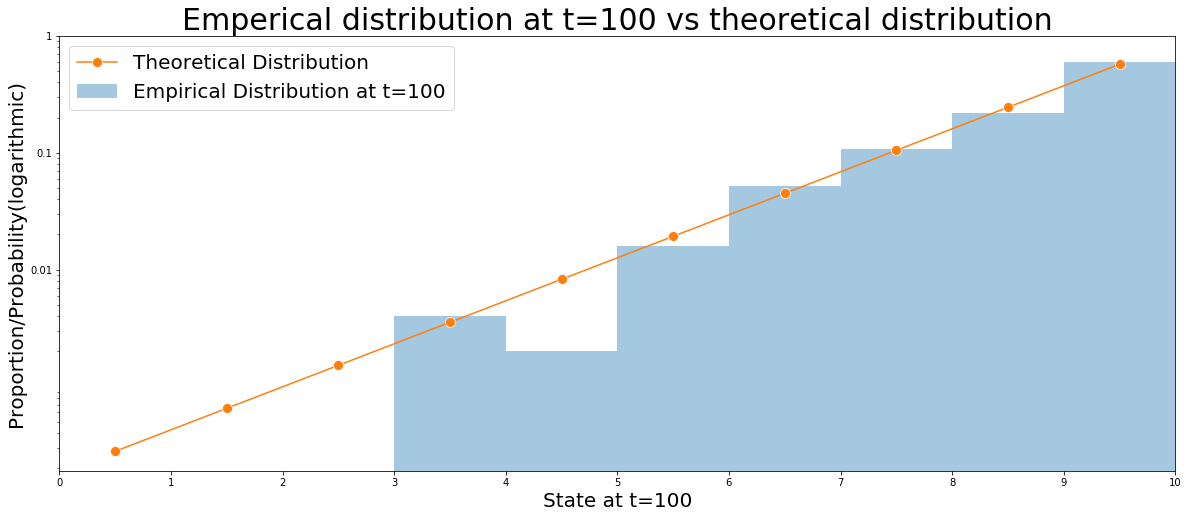

In [89]:
L = 10
p = 0.7
steps = 100 #final state after 100 steps
finalstate_100 = np.zeros(500) #500 realizations
emp_100 = np.zeros(500)

for i in range(0, 500):
    finalstate_100[i] = (cSRW(L, p, steps)[steps-1])

stdist = np.zeros(L)
thecdf = np.zeros(L)
const = p/(1-p)
stdist[0] = (1-const)/(1-(const)**L)
x = np.linspace(1, 10, 10)
for i in range(1, L):
    stdist[i] = const * stdist[i-1]
thecdf = np.cumsum(stdist)

plt.figure(figsize = (20, 8))    
sns.distplot(finalstate_100, bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], 
             norm_hist = True, kde = False, axlabel = False, 
             label = "Empirical Distribution at t=100")
sns.lineplot(x+0.5, stdist, marker = "o", markersize = 10, 
            label = "Theoretical Distribution")
plt.yscale("log")
plt.yticks([1, 0.1, 0.01], [1, 0.1, 0.01]);
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]);
plt.xlim([1, 11]);
plt.legend(fontsize = 20)
plt.ylabel("Proportion/Probability(logarithmic)", fontsize = 20)
plt.xlabel("State at t=100", fontsize = 20)
plt.title("Emperical distribution at t=100 vs theoretical distribution", fontsize = 30)

# THEORETICAL STATIONARY DISTRIBUTION

In [8]:
stdist = np.zeros(L)
thecdf = np.zeros(L)
const = p/(1-p)
stdist[0] = (1-const)/(1-(const)**L)
x = np.linspace(1, 10, 10)
for i in range(1, L):
    stdist[i] = const * stdist[i-1]
    
thecdf = np.cumsum(stdist)

# part c

Text(0.5, 1.0, 'Emperical distribution for 500 timesteps vs theoretical distribution')

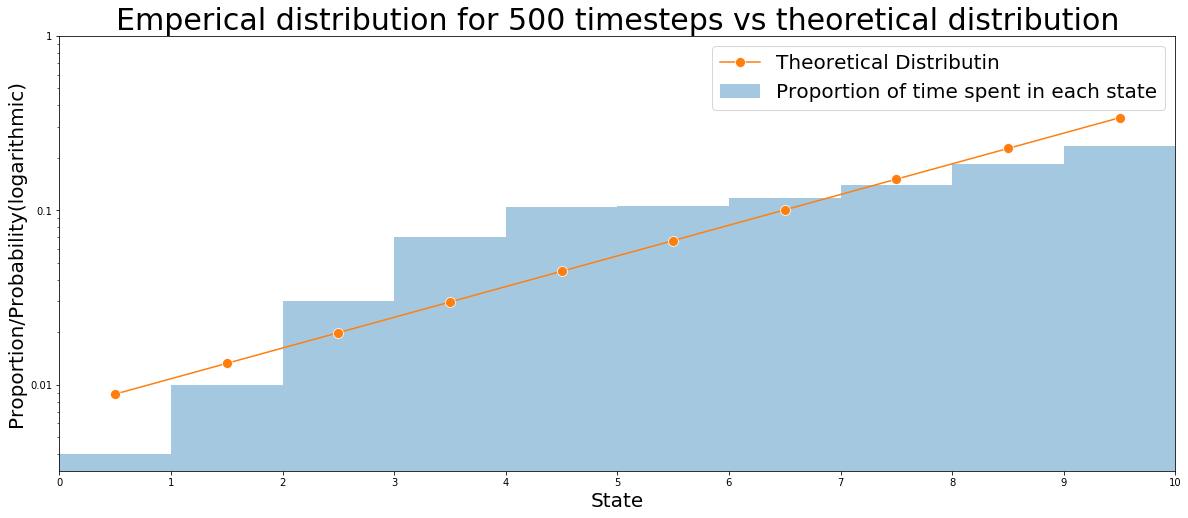

In [91]:
L = 10
p = 0.6
steps = 500
states = cSRW(L, p, steps)
stdist = np.zeros(L)
thecdf = np.zeros(L)
const = p/(1-p)
stdist[0] = (1-const)/(1-(const)**L)
x = np.linspace(1, 10, 10)
for i in range(1, L):
    stdist[i] = const * stdist[i-1]
thecdf = np.cumsum(stdist)

plt.figure(figsize = (20, 8))
sns.distplot(states, bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], 
             norm_hist = True, kde = False, axlabel = False, 
            label = "Proportion of time spent in each state")
sns.lineplot(x+0.5, stdist, marker = "o", markersize = 10, 
            label = "Theoretical Distributin")
plt.yscale("log")
plt.yticks([1, 0.1, 0.01], [1, 0.1, 0.01]);
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]);
plt.xlim([1, 11]);
plt.legend(fontsize = 20)
plt.ylabel("Proportion/Probability(logarithmic)", fontsize = 20)
plt.xlabel("State", fontsize = 20)
plt.title("Emperical distribution for 500 timesteps vs theoretical distribution", fontsize = 30)